In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
from jsm_routines import SHMF, CSMF, SHMR, scatter_stat
import os

In [66]:
as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

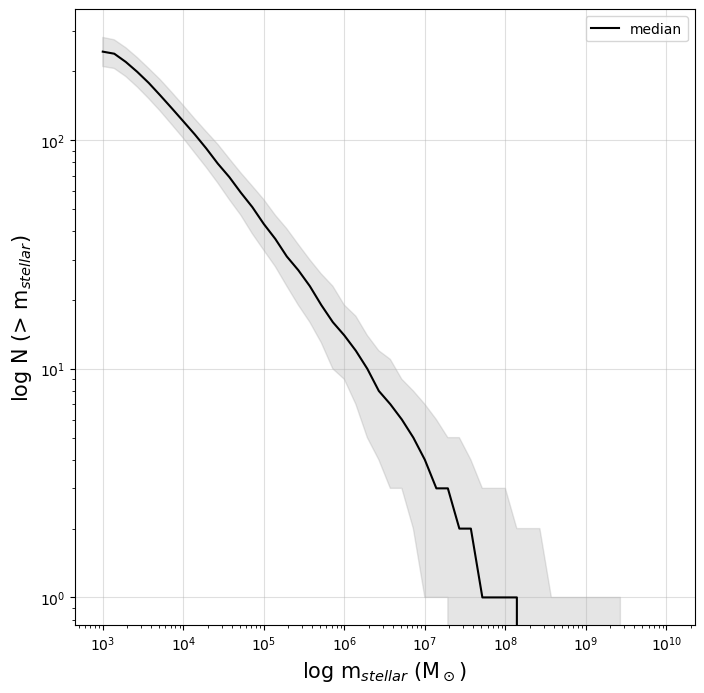

In [67]:
Ms = SHMR(as_data)

surv_massr, surv_CSMF = CSMF(Ms) # accreation mass of the surviving halos!

In [35]:
B13_Ms, RP17_Ms = SHMR(as_data, extra=True, red=as_red)

surv_massr_B, surv_CSMF_B = CSMF(B13_Ms, plot=False)

surv_massr_R, surv_CSMF_R = CSMF(RP17_Ms, plot=False)

/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:138: RuntimeWarning: overflow encountered in exp
  
/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:192: RuntimeWarning: overflow encountered in exp
  Logarithmic halo density slope at 0.01 R_vir, as a function of the


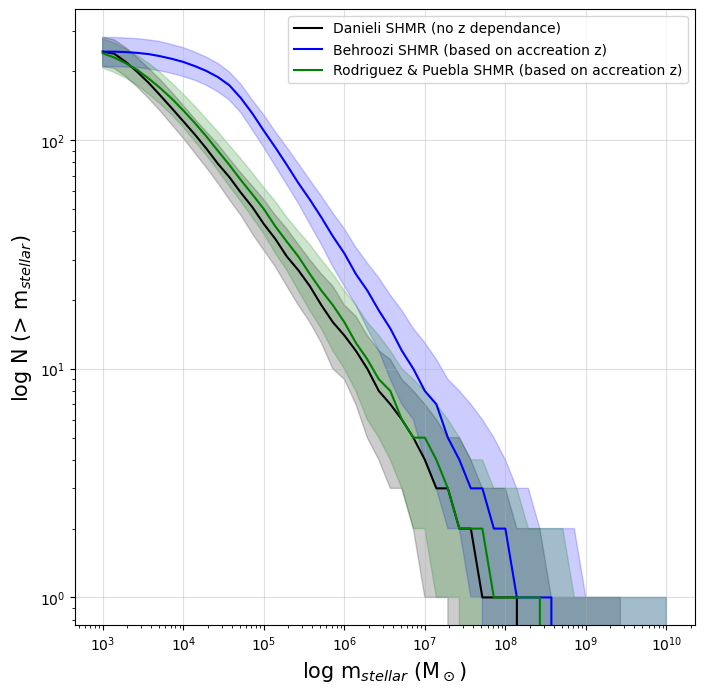

In [36]:
plt.figure(figsize=(8, 8))

plt.plot(surv_massr, surv_CSMF[1, :], label="Danieli SHMR (no z dependance)", color="black")
plt.fill_between(surv_massr, y1=surv_CSMF[0, :], y2=surv_CSMF[2, :], alpha=0.2, color="black")

plt.plot(surv_massr_B, surv_CSMF_B[1, :], label="Behroozi SHMR (based on accreation z)", color="blue")
plt.fill_between(surv_massr_B, y1=surv_CSMF_B[0, :], y2=surv_CSMF_B[2, :], alpha=0.2, color="blue")

plt.plot(surv_massr_R, surv_CSMF_R[1, :], label="Rodriguez & Puebla SHMR (based on accreation z)", color="green")
plt.fill_between(surv_massr_R, y1=surv_CSMF_R[0, :], y2=surv_CSMF_R[2, :], alpha=0.2, color="green")


plt.grid(alpha=0.4)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

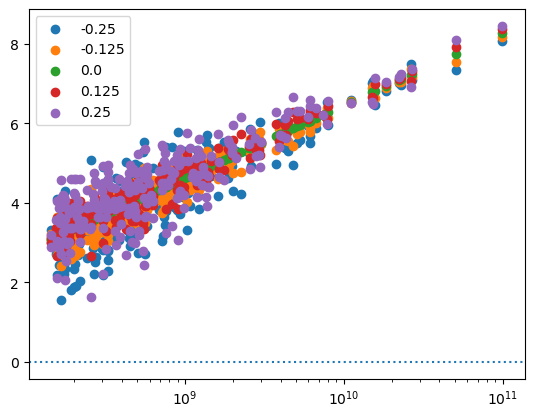

In [43]:
for i in np.linspace(-0.25, 0.25, 5):
    Ms = SHMR(as_data, alt="s", gamma=i, red=as_red)
    plt.scatter(as_data[0], Ms[0], label=str(i)) # only one iteration

plt.axhline(0, ls=":")
plt.xscale("log")
plt.legend()
plt.show()

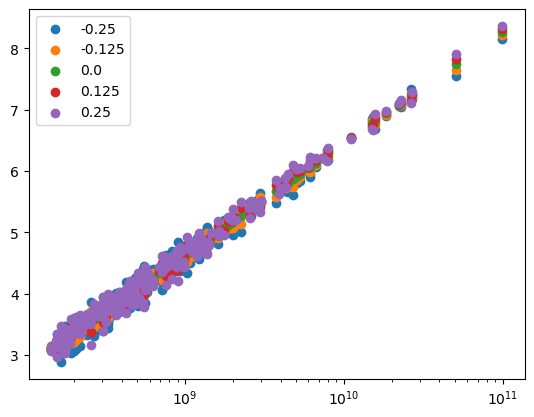

In [44]:
for i in np.linspace(-0.25, 0.25, 5):
    Ms = SHMR(as_data, alt="i", gamma=i, red=as_red)
    plt.scatter(as_data[0], Ms[0], label=str(i))  # only one iteration

#plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

### now implementing a redshift evolution but using the SHMF instead of the CSMF

In [56]:
def SMF(mass, Nbins=50, plot=True):
    
    def histofunc(mass, bins=False): # nested function
        if bins==True:
            return np.histogram(mass, range=(3, 10), bins=Nbins)
        else:
            return np.histogram(mass, range=(3, 10), bins=Nbins)[0]

    # now to start counting!
    m_counts, bins = histofunc(mass[0], bins=True)  # to be keep in memory, only needs to be measured once
    binsize = (bins[1] - bins[0])
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    I = np.apply_along_axis(histofunc, 1, mass)  # this applies the histogram to the whole matrix

    SHMF_ave = np.average(I, axis=0)

    SHMF_std = np.std(I, axis=0)
        
    if plot == True:
        plt.figure(figsize=(8, 8))

        plt.plot(bincenters, SHMF_ave/binsize, label="average", color="black")
        plt.plot(bincenters, (SHMF_ave+SHMF_std)/binsize, label="1 $\sigma$", ls=":", color="grey")
        plt.plot(bincenters, (SHMF_ave-SHMF_std)/binsize, ls=":", color="grey")

        plt.grid(alpha=0.4)
        plt.xlabel("log $m_*$", fontsize=20)
        plt.ylabel("log[ dN / dlog($m_*$) ]", fontsize=20)
        plt.yscale("log")
        plt.legend()
        plt.show()

    return bincenters, np.array([SHMF_ave, SHMF_std])